# Basic Nipype

**Author:** Steffen Bollmann

**Date:** 17 Oct 2024

### Citation and Resources:
#### Dataset from OSF
- Shaw, T., & Bollmann, S. (2020). Dataset for Towards Optimising MRI Methods for ChAracterisation of Tissue (TOMCAT) [Data set]. OSF. [https://doi.org/10.17605/OSF.IO/BT4EZ](https://doi.org/10.17605/OSF.IO/BT4EZ)

#### Tools included in this workflow
__Nipype:__
- Esteban, O., Markiewicz, C. J., Burns, C., Goncalves, M., Jarecka, D., Ziegler, E., Berleant, S., Ellis, D. G., Pinsard, B., Madison, C., Waskom, M., Notter, M. P., Clark, D., Manhães-Savio, A., Clark, D., Jordan, K., Dayan, M., Halchenko, Y. O., Loney, F., … Ghosh, S. (2025). nipy/nipype: 1.8.6 (1.8.6). Zenodo. [https://doi.org/10.5281/zenodo.15054147](https://doi.org/10.5281/zenodo.15054147)

__FSL:__
- M. Jenkinson, C.F. Beckmann, T.E. Behrens, M.W. Woolrich, S.M. Smith. FSL. [NeuroImage, 62:782-90, 2012](https://www.sciencedirect.com/science/article/abs/pii/S1053811911010603?via%3Dihub)
- Smith S. M. (2002). Fast robust automated brain extraction. Human brain mapping, 17(3), 143–155. [https://doi.org/10.1002/hbm.10062](https://doi.org/10.1002/hbm.10062)

__AFNI:__
- Cox RW (1996). AFNI: software for analysis and visualization of functional magnetic resonance neuroimages. Comput Biomed Res 29(3):162-173. doi:10.1006/cbmr.1996.0014 [https://pubmed.ncbi.nlm.nih.gov/8812068/](https://pubmed.ncbi.nlm.nih.gov/8812068/)
- RW Cox, JS Hyde (1997). Software tools for analysis and visualization of FMRI Data. NMR in Biomedicine, 10: 171-178.
[https://pubmed.ncbi.nlm.nih.gov/9430344/](https://pubmed.ncbi.nlm.nih.gov/9430344/)

__SPM12:__
- Friston, K. J. (2007). Statistical parametric mapping: The analysis of functional brain images (1st ed). Elsevier / Academic Press.
- [Online Book](https://www.fil.ion.ucl.ac.uk/spm/doc/books/spm/Statistical_Parametric_Mapping_The_Analysis_of_Functional_Brain_Images.pdf)

# Demonstrating the module system in Python and Nipype

In [4]:
# we can use module to load fsl in a specific version
import module
await module.load('fsl/6.0.4')
await module.list()

['fsl/6.0.4']

In [6]:
!bet


Usage:    bet <input> <output> [options]

Main bet2 options:
  -o          generate brain surface outline overlaid onto original image
  -m          generate binary brain mask
  -s          generate approximate skull image
  -n          don't generate segmented brain image output
  -f <f>      fractional intensity threshold (0->1); default=0.5; smaller values give larger brain outline estimates
  -g <g>      vertical gradient in fractional intensity threshold (-1->1); default=0; positive values give larger brain outline at bottom, smaller at top
  -r <r>      head radius (mm not voxels); initial surface sphere is set to half of this
  -c <x y z>  centre-of-gravity (voxels not mm) of initial mesh surface.
  -t          apply thresholding to segmented brain image and mask
  -e          generates brain surface as mesh in .vtk format

Variations on default bet2 functionality (mutually exclusive options):
  (default)   just run bet2
  -R          robust brain centre estimation (iterates BE

## Load AFNI and SPM as well

In [7]:
await module.load('afni/22.3.06')
await module.load('spm12/r7771')
await module.list()

['fsl/6.0.4', 'afni/22.3.06', 'spm12/r7771']

## Download test data

In [8]:
%%bash
if [ -f ./sub-01_ses-01_7T_T1w_defaced.nii ]; then
    echo "nii Output file exists, not downloading or unpacking again"
else
    if [ ! -f ./sub-01_ses-01_7T_T1w_defaced.nii.gz  ]; then
        echo "nii.gz does not exist. So, it needs to be downloaded."
        osfURL="osfstorage/TOMCAT_DIB/sub-01/ses-01_7T/anat/sub-01_ses-01_7T_T1w_defaced.nii.gz"
        echo "downloading now ..."
        osf -p bt4ez fetch $osfURL ./sub-01_ses-01_7T_T1w_defaced.nii.gz
    fi

    if [  -f ./sub-01_ses-01_7T_T1w_defaced.nii.gz ]; then
        echo "nii.gz exists. So, it needs to be unpacked and deleted"
        echo "unpacking now ..."
        gunzip ./sub-01_ses-01_7T_T1w_defaced.nii.gz
    fi
fi

nii.gz does not exist. So, it needs to be downloaded.
downloading now ...


100%|██████████| 72.7M/72.7M [00:09<00:00, 7.91Mbytes/s]


nii.gz exists. So, it needs to be unpacked and deleted
unpacking now ...


In [9]:
%ls 

AA_Neurodesk_demo_tour.ipynb  nipype_full.ipynb
MRIQC.ipynb                   nipype_short.ipynb
PyBIDS.ipynb                  papermill-slurm-submission-example.ipynb
RISE_slideshow.ipynb          pydra_preproc_ants.ipynb
bids_conversion.ipynb         sub-01_ses-01_7T_T1w_defaced.nii
ds000114/


## Run nipype pipeline

In [10]:
%%capture
!pip install nibabel numpy scipy

In [11]:
from nipype.interfaces import fsl
from nipype.interfaces import afni

btr = fsl.BET()
btr.inputs.in_file = './sub-01_ses-01_7T_T1w_defaced.nii'
btr.inputs.frac = 0.4
btr.inputs.out_file = './sub-01_ses-01_7T_T1w_defaced_brain.nii'
res = btr.run() 

edge3 = afni.Edge3()
edge3.inputs.in_file = './sub-01_ses-01_7T_T1w_defaced.nii'
edge3.inputs.out_file = './sub-01_ses-01_7T_T1w_defaced_edges.nii'
edge3.inputs.datum = 'byte'
res = edge3.run()

251031-00:21:58,67 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI
251031-00:22:15,242 nipype.interface INFO:
	 stderr 2025-10-31T00:22:15.242645:++ 3dedge3: AFNI version=AFNI_22.3.06 (Nov 15 2022) [64-bit]
251031-00:22:15,244 nipype.interface INFO:
	 stderr 2025-10-31T00:22:15.244144:** AFNI converts NIFTI_datatype=4 (INT16) in file /home/jovyan/Git_repositories/example-notebooks/books/workflows/sub-01_ses-01_7T_T1w_defaced.nii to FLOAT32
251031-00:22:15,244 nipype.interface INFO:
	 stderr 2025-10-31T00:22:15.244144:     Warnings of this type will be muted for this session.
251031-00:22:15,245 nipype.interface INFO:
	 stderr 2025-10-31T00:22:15.244144:     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
251031-00:22:15,246 nipype.interface INFO:
	 stderr 2025-10-31T00:22:15.246179:*+ WARNING:   If you are performing spatial transformations on an oblique dset,
251031-00:22:15,246 nipype.interface INFO:
	 stderr 202

In [12]:
%ls

AA_Neurodesk_demo_tour.ipynb  nipype_short.ipynb
MRIQC.ipynb                   papermill-slurm-submission-example.ipynb
PyBIDS.ipynb                  pydra_preproc_ants.ipynb
RISE_slideshow.ipynb          sub-01_ses-01_7T_T1w_defaced.nii
bids_conversion.ipynb         sub-01_ses-01_7T_T1w_defaced_brain.nii.gz
ds000114/                     sub-01_ses-01_7T_T1w_defaced_edges.nii
nipype_full.ipynb


In [13]:
# View 3D data
import matplotlib.pyplot as plt

def view_slices_3d(image_3d, slice_nbr, vmin, vmax, title=''):
#   print('Matrix size: {}'.format(image_3d.shape))
  fig = plt.figure(figsize=(15, 4))
  plt.suptitle(title, fontsize=10)

  plt.subplot(131)
  plt.imshow(np.take(image_3d, slice_nbr, 2), vmin=vmin, vmax=vmax, cmap='gray')
  plt.title('Axial');

  plt.subplot(132)
  image_rot = ndimage.rotate(np.take(image_3d, slice_nbr, 1),90)
  plt.imshow(image_rot, vmin=vmin, vmax=vmax, cmap='gray')
  plt.title('Coronal');

  plt.subplot(133)
  image_rot = ndimage.rotate(np.take(image_3d, slice_nbr, 0),90)
  plt.imshow(image_rot, vmin=vmin, vmax=vmax, cmap='gray')
  plt.title('Sagittal');
  cbar=plt.colorbar()

def get_figure():
    """
    Returns figure and axis objects to plot on. 
    """
    fig, ax = plt.subplots(1)
    plt.tick_params(top=False, right=False, which='both') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return fig, ax

In [14]:
import nibabel as nib
from matplotlib import transforms
from scipy import ndimage
import numpy as np

# load data
brain_full = nib.load('./sub-01_ses-01_7T_T1w_defaced.nii').get_fdata()
brain = nib.load('./sub-01_ses-01_7T_T1w_defaced_brain.nii.gz').get_fdata()
edges = nib.load('./sub-01_ses-01_7T_T1w_defaced_edges.nii').get_fdata()

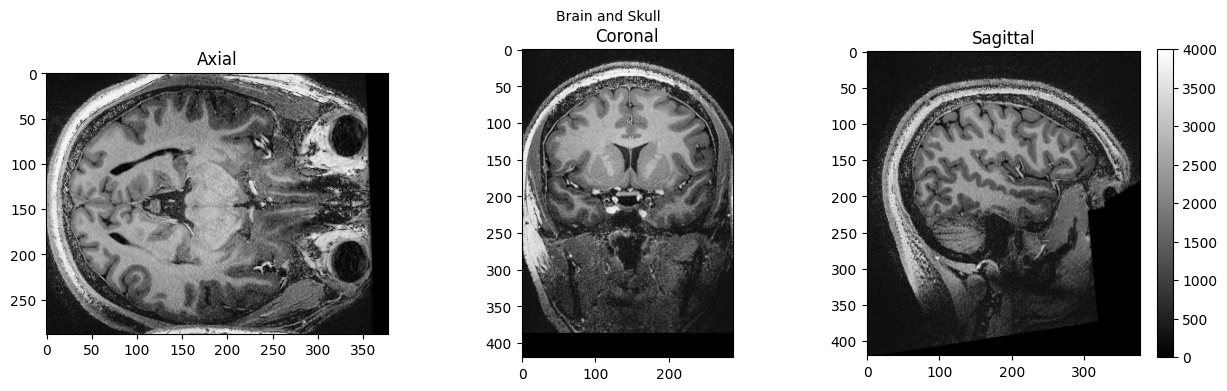

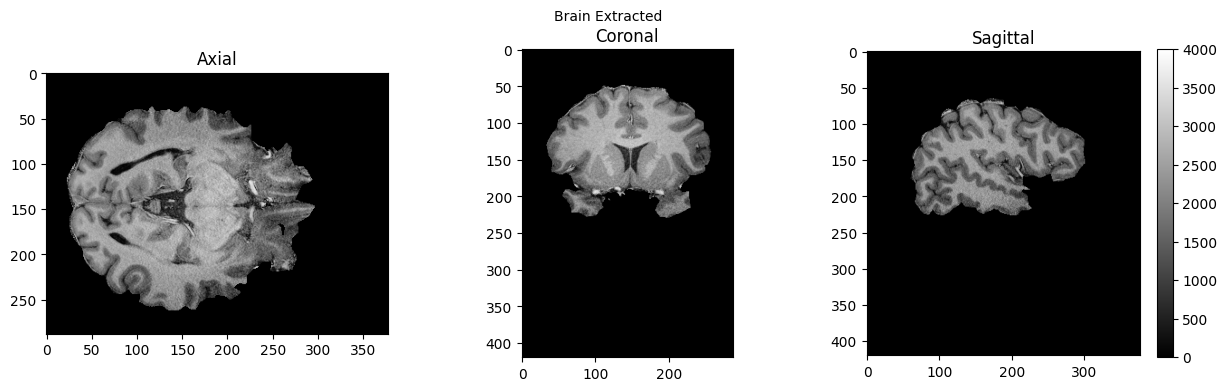

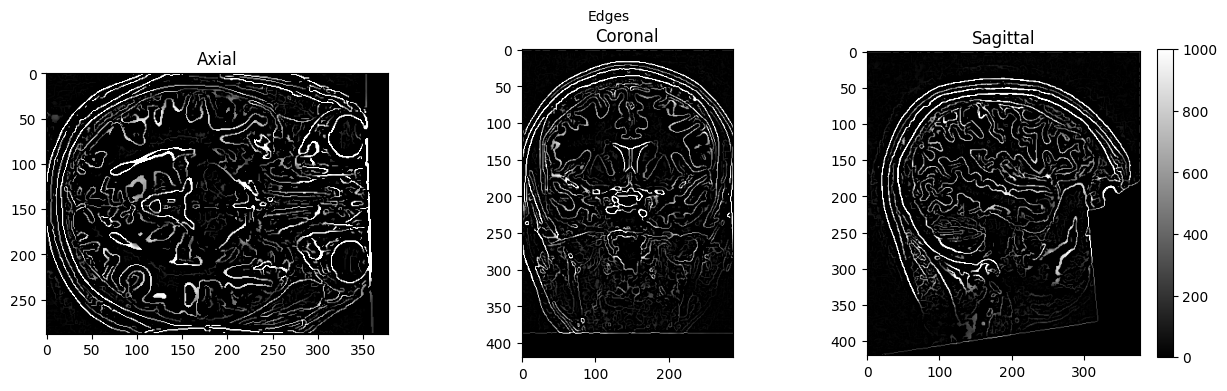

In [15]:
view_slices_3d(brain_full, slice_nbr=230, vmin=0, vmax=4000, title='Brain and Skull')
view_slices_3d(brain, slice_nbr=230, vmin=0, vmax=4000, title='Brain Extracted')
view_slices_3d(edges, slice_nbr=230, vmin=0, vmax=1000, title='Edges')

In [16]:
from ipyniivue import NiiVue

nv = NiiVue()
nv.load_volumes([{"path": "./sub-01_ses-01_7T_T1w_defaced_brain.nii.gz"}])
nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7f7…

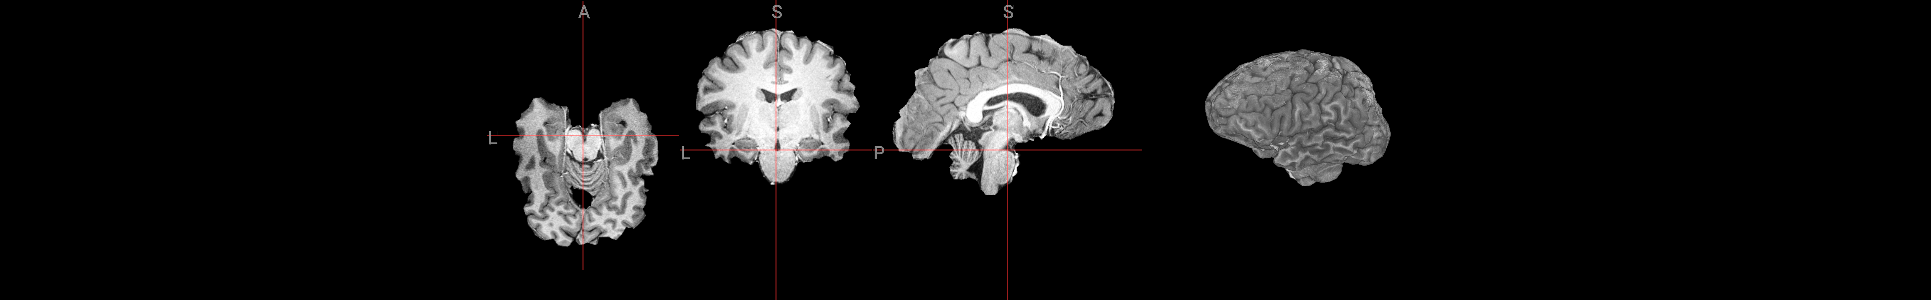

In [1]:
from IPython.display import Image
Image(filename='../../static/examples/workflows/nipype_short/sub-01_ses-01_7T_T1w_defaced_brain.png')

SPM can also be used in such a workflow, but unfortunately, this will trigger a warning "stty: 'standard input': Inappropriate ioctl for device", which you can ignore (or help us to find out where it comes from):

In [18]:
import nipype.interfaces.spm as spm

norm12 = spm.Normalize12()
norm12.inputs.image_to_align = './sub-01_ses-01_7T_T1w_defaced.nii'
norm12.run()

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


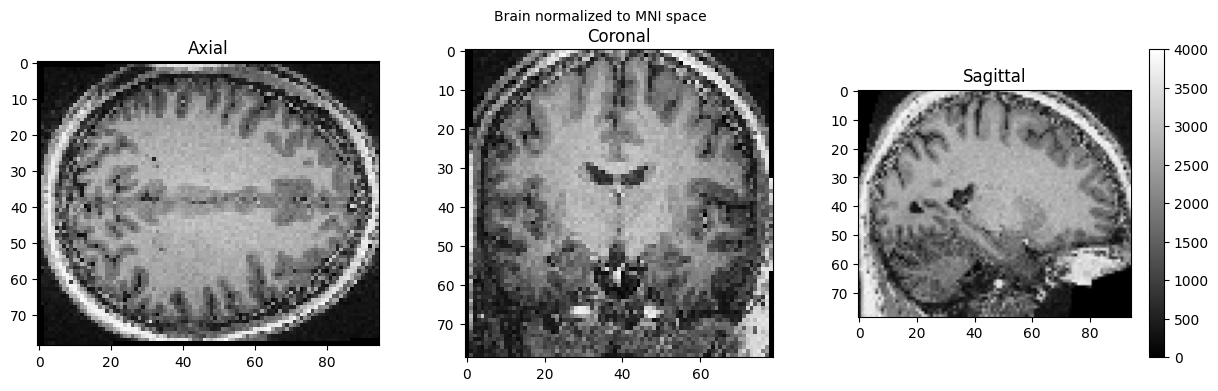

In [19]:
brain_full = nib.load('./wsub-01_ses-01_7T_T1w_defaced.nii').get_fdata()
view_slices_3d(brain_full, slice_nbr=50, vmin=0, vmax=4000, title='Brain normalized to MNI space')

In [20]:
nv = NiiVue()
nv.load_volumes([{"path": "./wsub-01_ses-01_7T_T1w_defaced.nii"}])
nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7f7…

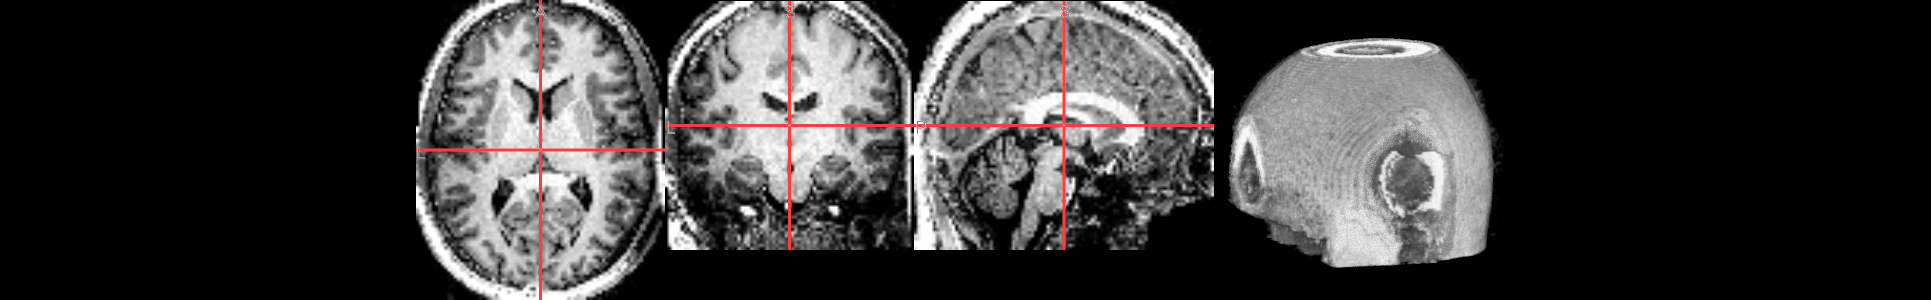

In [2]:
Image(filename='../../static/examples/workflows/nipype_short/wsub-01_ses-01_7T_T1w_defaced.png')

#### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [22]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2025-10-31T00:29:05.110304+00:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

ipyniivue : 2.3.2
nibabel   : 5.2.1
matplotlib: 3.8.4
IPython   : 8.16.1
numpy     : 2.2.6
nipype    : 1.8.6
scipy     : 1.13.0

